# A/B Testing

A/B testing (also known as split testing or bucket testing) is a method of comparing two versions of a webpage or app against each other to determine which one performs better. AB testing is essentially an experiment where two or more variants of a page are shown to users at random, and statistical analysis is used to determine which variation performs better for a given conversion goal.

#### Goal 
To understand if a difference between two versions is statistically significant
#### Why business do A/B Testing? 
To understand customer behavior with data driven approach, not intuition.

## Import Library

In [25]:
# importing required packages
import warnings
warnings.filterwarnings("ignore")
import pyodbc
import textwrap
from numpy import nansum
from numpy import nanmean
import pandas as pd
#import statsmodels.stats.api as sms
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

## Load Dataset

In [13]:
control=pd.read_csv('control_data.csv')
experiment=pd.read_csv('experiment_data.csv')

#print(len(control),len(experiment))

experiment['Clicks']=experiment['Clicks']+250
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


#### About the data

Data for the final project on A/B testing by udacity.

#### The meaning of each column is:

1. Pageviews: Number of unique cookies to view the course overview page that day. 
2. Clicks: Number of unique cookies to click the course overview page that day. 
3. Enrollments: Number of user-ids to enroll in the free trial that day. 
4. Payments: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment. (Note that 5.the date for this column is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)


## Labelling the Data by Control and Experiments

In [14]:
type=[]
for i in range(len(control)):
    type.append('control')
    

In [15]:
for i in range(len(experiment)):
    type.append('experiment')

## Concat Control data and Experiment Data into single Dataset

In [16]:
ab_data=pd.concat([control,experiment],axis=0)
ab_data=ab_data.drop(['Date','Enrollments','Payments'],1)
dataset=pd.DataFrame(ab_data)
dataset['type']=type
dataset

,Pageviews,Clicks,type
0,7723,687,control
1,9102,779,control
2,10511,909,control
3,9871,836,control
4,10014,837,control
...,...,...,...
32,10042,1052,experiment
33,9721,1079,experiment
34,9304,1020,experiment
35,8668,974,experiment


## A/B Testing Question
The question of this dataset is whether the Treatment Giving will affect how many Pageviews and Clicks from the applicant 

## A/B Testing by Data Exploration and Visualization

Text(0.5, 1.0, 'Boxplot of Pageviews')

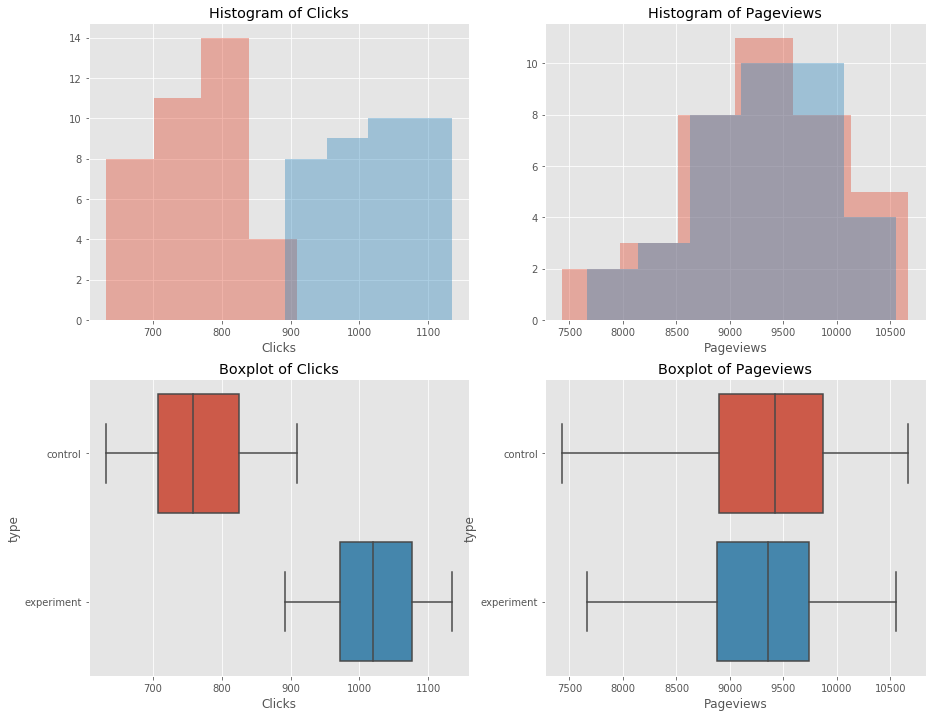

In [17]:
plt.style.use('ggplot')
f=plt.figure(figsize=(15,12))
f.add_subplot(2,2,1)
df = dataset[dataset.type == 'control']
sns.distplot(df['Clicks'],  kde=False, label='control')

df = dataset[dataset.type == 'experiment']
sns.distplot(df['Clicks'],  kde=False, label='experiment')
plt.title('Histogram of Clicks')

f.add_subplot(2,2,2)
df = dataset[dataset.type == 'control']
sns.distplot(df['Pageviews'],  kde=False, label='control')
df = dataset[dataset.type == 'experiment']
sns.distplot(df['Pageviews'],  kde=False, label='experiment')
plt.title('Histogram of Pageviews')

f.add_subplot(2,2,3)
sns.boxplot(dataset['Clicks'],y=dataset['type'])
plt.title('Boxplot of Clicks')


f.add_subplot(2,2,4)
sns.boxplot(dataset['Pageviews'],y=dataset['type'])
plt.title('Boxplot of Pageviews')


From the boxplot and distribution plot, it can be seen that the Clicks variable changes and increases after being given treatment, while the Pagviews variable does not look any difference, before and after being given a treatment

## A/B Testing with Hypothesis testing

Hypotesting Testing that will be used is Z_test because the amount of data is greater than 30. So, I will build The A/B Testing Function 

In [22]:
def Z_test(data1,data2) :
    data1_mean=np.mean(data1)
    data2_mean=np.mean(data2)
    data1_std=np.std(data1)
    data2_std=np.std(data2)
    ztest ,pval1 = stests.ztest(data1, x2=data2, value=0,alternative='two-sided')
    decision1="reject null hypothesis"
    decision2="accept null hypothesis"
    decision= decision1 if pval1<0.05 else decision2
    
    tabel=pd.DataFrame()
    tabel['Data']=['Control','Group']
    tabel['Mean']=[data1_mean,data2_mean]
    tabel['Standar_Dev']=[data1_std,data2_std]
    tabel['Z_Score']=[ztest,'']
    tabel['P-Value']=[pval1,'']
    tabel['Decision']=[decision,'']
    return tabel

### A/B Testing for Clicks

1. H0 : There is no difference of Number Clicks after being given the treatmant
2. H1 : There is a difference significantly from Number Clicks after being given the treatmant

If the P-Value is less than 0.05, then reject Null Hypothesis

In [23]:
Z_test(control['Clicks'],experiment['Clicks'])

,Data,Mean,Standar_Dev,Z_Score,P-Value,Decision
0,Control,766.972973,67.357652,-16.0872,3.13762e-58,reject null hypothesis
1,Group,1015.540541,63.699716,,,


#### Interpretation

From the table, we can see that the P-value is less than 0.05, so Decision is Reject Null Hypothesis. So, we can conclude that There is a difference significantly from Number Clicks after being given the treatmant

-----

### A/B Testing for Pageviews

1. H0 : There is no difference of Number Pageviews after being given the treatmant
2. H1 : There is a difference significantly from Number Pageviews after being given the treatmant

If the P-Value is less than 0.05, then reject Null Hypothesis

In [28]:
Z_test(control['Pageviews'],experiment['Pageviews'])

,Data,Mean,Standar_Dev,Z_Score,P-Value,Decision
0,Control,9339.000000,730.167807,0.141712,0.887308,accept null hypothesis
1,Group,9315.135135,698.436716,,,


#### Interpretation

From the table, we can see that the P-value is greater than 0.05, so the Decision is to not to Reject Null Hypothesis. So, we can conclude that There is no difference of Number Pageviews after being given the treatmant